# Prediction of Obesity Risk - Predicting

## Problem Statement

# Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border

import joblib

# Load Data

In [2]:
data = pd.read_csv('../Data/Raw/test.csv')
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 13840 rows and 17 columns


In [19]:
# Creating a copy of the dataset in memory in case of misediting
df = data.copy()

In [21]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,13840.000,NaN,NaN,NaN,27677.500,3995.408,20758.000,24217.750,27677.500,31137.250,34597.000
Gender,13840,2,Female,6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,13840.000,NaN,NaN,NaN,23.953,5.800,14.000,20.000,22.906,26.000,61.000
Height,13840.000,NaN,NaN,NaN,1.699,0.089,1.450,1.632,1.700,1.761,1.980
Weight,13840.000,NaN,NaN,NaN,87.385,26.112,39.000,65.000,83.953,111.158,165.057
family_history_with_overweight,13840,2,yes,11384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,13840,2,yes,12583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,13840.000,NaN,NaN,NaN,2.443,0.532,1.000,2.000,2.358,3.000,3.000
NCP,13840.000,NaN,NaN,NaN,2.751,0.711,1.000,3.000,3.000,3.000,4.000
CAEC,13840,4,Sometimes,11689,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['CALC'].value_counts()

Sometimes     9979
no            3513
Frequently     346
Always           2
Name: CALC, dtype: int64

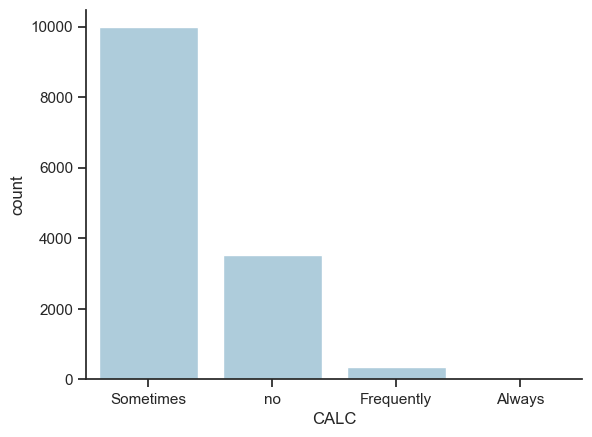

In [24]:
sb.countplot(data=df, x='CALC')
plt.show()

# Data Preprocessing

In [26]:
df.loc[df['CALC'] == 'Always', 'CALC'] = 'Frequently'

In [27]:
df.drop('id', axis=1, inplace=True)
df['NCP'] = df['NCP'].round()

In [28]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 8 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numeric columns: 8 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Transform Data

In [29]:
# Define transformers for different column types

numerical_transformer = joblib.load('../Models/scaler.joblib') 
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine transformers for specific columns
preprocessor = ColumnTransformer([
    ("num", numerical_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Fit transformers on training data only
df_transformed = preprocessor.fit_transform(df)
df_transformed

array([[ 0.50816334,  1.68278868,  1.27378625, ...,  0.        ,
         1.        ,  0.        ],
       [-0.50912784, -1.11465762, -0.81898841, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.35299999, -0.62619119,  0.92743153, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.17537884, -1.27749479, -1.64712469, ...,  0.        ,
         1.        ,  0.        ],
       [-0.50912784, -0.88932424, -1.31686525, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.43764818,  1.27679426,  1.28666709, ...,  0.        ,
         1.        ,  0.        ]])

In [30]:
df_transformed.shape

(13840, 22)

In [31]:
model = joblib.load('../Models/trained_model.joblib')

In [32]:
y_hat = model.predict(df_transformed)
y_hat

array([3, 5, 4, ..., 0, 1, 3])

In [45]:
df_sub = pd.DataFrame()
df_sub['id'] = data['id']

In [47]:
df_sub['NObeyesdad_Encoded'] = pd.Series(y_hat)
df_sub.head()

,id,NObeyesdad_Encoded
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [48]:
lbl_encoder = joblib.load('../Models/label_encoder.joblib')
original_categories = lbl_encoder.inverse_transform(df_sub['NObeyesdad_Encoded'])

In [49]:
original_categories

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [50]:
df_sub['NObeyesdad'] = pd.Series(original_categories)
df_sub.head()

,id,NObeyesdad_Encoded,NObeyesdad
0,20758,3,Obesity_Type_II
1,20759,5,Overweight_Level_I
2,20760,4,Obesity_Type_III
3,20761,2,Obesity_Type_I
4,20762,4,Obesity_Type_III


In [51]:
df_sub.drop('NObeyesdad_Encoded', axis=1, inplace=True)
df_sub.to_csv('../Data/Final/submission.csv', index=False)